In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Reshape and normalize data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255.0


In [5]:

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

datagen.fit(X_train)

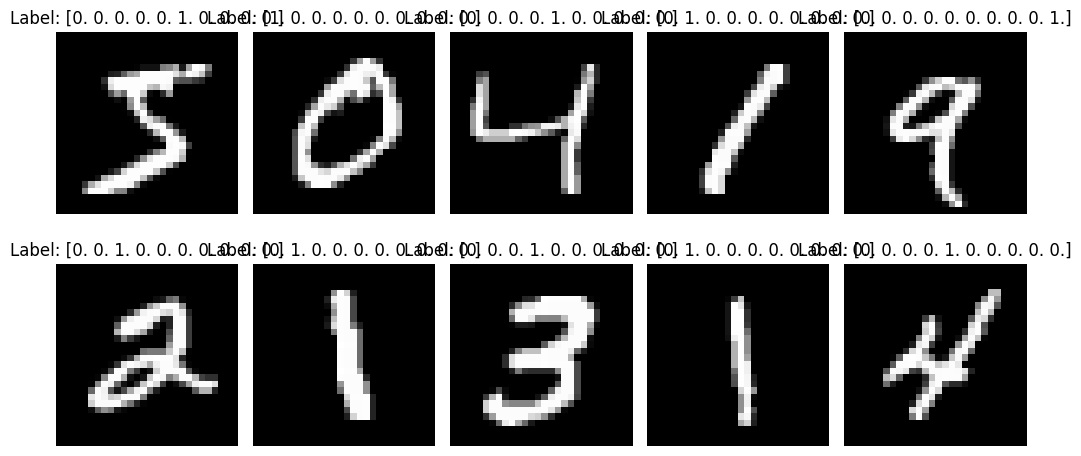

In [7]:
# Visualize some sample data
def plot_sample_images(X_train, y_train):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(f'Label: {y_train[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(X_train, y_train)


In [8]:

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding Dropout to prevent overfitting
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Fit the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)  # Increased epochs for better training


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9935 - val_loss: 0.0219
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 43ms/step - accuracy: 0.9871 - loss: 0.0450 - val_accuracy: 0.9938 - val_loss: 0.0186
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9867 - loss: 0.0462 - val_accuracy: 0.9944 - val_loss: 0.0195
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9869 - loss: 0.0445 - val_accuracy: 0.9948 - val_loss: 0.0184
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9875 - loss: 0.0452 - val_accuracy: 0.9944 - val_loss: 0.0183
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9885 - loss: 0.0406 - val_accuracy: 0.9949 - val_loss: 0.0172
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9865 - loss: 0.0462 - val_accuracy: 0.9934 - val_loss: 0.0222
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9884 

In [14]:
# Save the model
model.save('digit_recognition_model.h5')

In [15]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0223
Test Accuracy: 0.9945


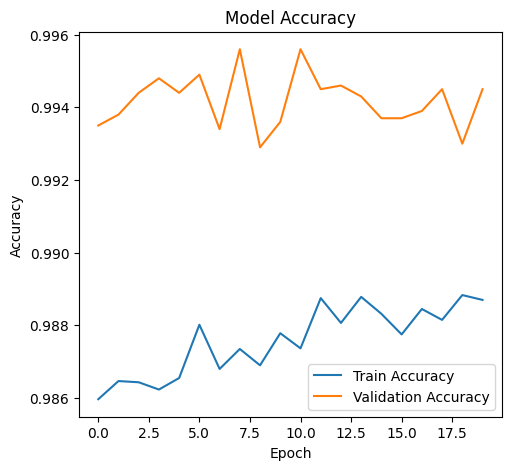

In [17]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

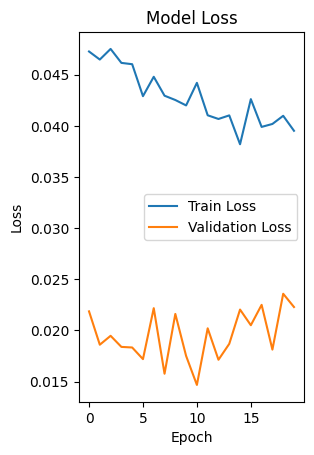

In [18]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [19]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


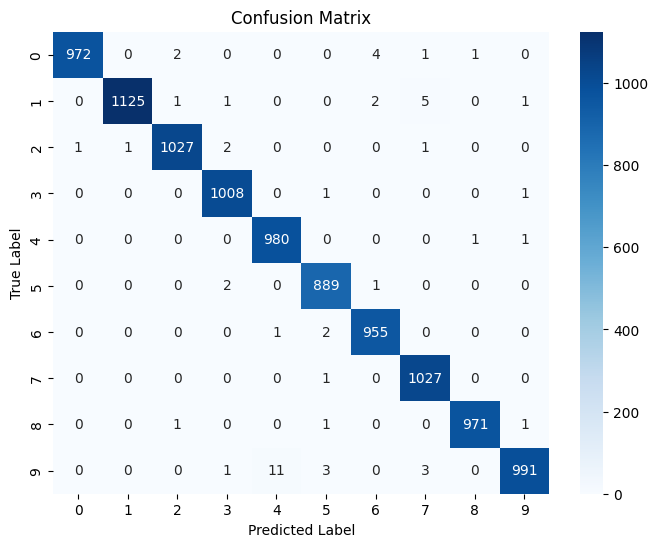

In [20]:

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      1.00      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:

# Function to preprocess images captured from the webcam or loaded from file
def preprocess_image(image_path):
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 pixels
    image = cv2.resize(image, (28, 28))

    # Apply Gaussian Blur to smoothen the image
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply adaptive thresholding to make the digit stand out
    image = cv2.adaptiveThreshold(image, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 2)

    # Normalize and reshape
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)

    return image

In [23]:
# Function to capture an image using the webcam (for use in Colab)
def take_photo(filename='photo.jpg', quality=0.8):
    from IPython.display import display, Javascript
    from google.colab.output import eval_js
    from base64 import b64decode

    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture Photo';
        div.appendChild(capture);
        document.body.appendChild(div);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(video);
        video.srcObject = stream;
        await new Promise((resolve) => {
          video.onloadedmetadata = () => {
            resolve(video.play());
          };
        });

        // Resize video element to capture size
        const canvas = document.createElement('canvas');
        canvas.width = 640;
        canvas.height = 480;
        div.appendChild(canvas);
        const context = canvas.getContext('2d');

        // Trigger photo capture
        await new Promise((resolve) => {
          capture.onclick = () => {
            context.drawImage(video, 0, 0, canvas.width, canvas.height);
            stream.getTracks().forEach(track => track.stop());
            resolve(canvas.toDataURL('image/jpeg', quality));
          };
        });

        div.remove();
        video.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


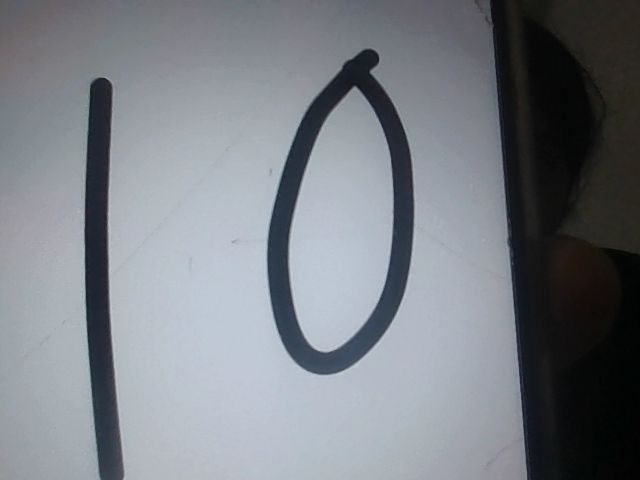

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Digit: 6


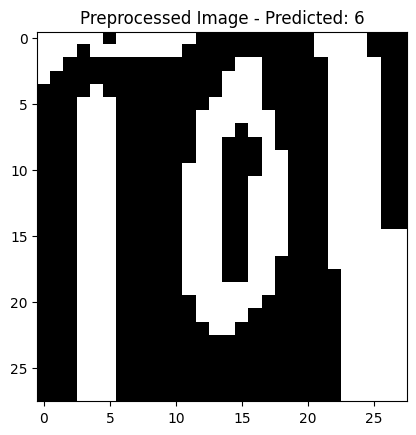

In [69]:
# Predict digit from webcam image
from google.colab.patches import cv2_imshow
try:
    filename = take_photo()
    print(f"Saved to {filename}")

    # Display the captured image using cv2_imshow instead of cv2.imshow
    # Correct import for Google Colab

    # Display the captured image
    img = cv2.imread(filename)
    cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow for Google Colab
    # Preprocess the captured image
    processed_image = preprocess_image(filename)

    # Predict the digit using the model
    prediction = model.predict(processed_image)
    predicted_digit = np.argmax(prediction, axis=1)[0]

    # Show the predicted digit
    print(f'Predicted Digit: {predicted_digit}')

    # Visualize the preprocessed image
    plt.imshow(processed_image.reshape(28, 28), cmap='gray')
    plt.title(f'Preprocessed Image - Predicted: {predicted_digit}')
    plt.show()

except Exception as e:
    print(f"Error: {e}")